In [9]:
import glob
import tensorflow as tf
from tensorflow.keras.models import save_model 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,LSTM,Dense, SimpleRNN,Dropout
import numpy as np
from PIL import Image

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import IPython.display as ipd

import librosa
import librosa.display


# 저장한 이미지를 직접 불러와 형태를 보는
import PIL.Image as pilimg

#폴더의 리스트 모으는데 사용할걳
from tqdm import tqdm_notebook as tq
import os


### 이전 사용했던 이미지

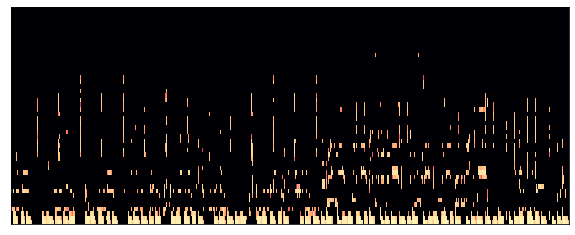

(48, 1876)

In [3]:
# 아레나  npy 원본 파일을 mel-spectrum 이미지로 변환할때
mel = np.load("./arena/144008.npy")
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel, ref=np.max), sr=16000, hop_length=256)
plt.show()
mel.shape

In [4]:
print(mel)

[[-15.558379  -14.454204  -15.53637   ...  10.743402    9.804948
    2.2214491]
 [-16.358786  -14.225029  -19.029495  ...   3.4667535   3.05398
   -3.0818808]
 [ -6.997593   -7.32259    -7.852475  ...  -8.701347   -9.423894
   -8.658731 ]
 ...
 [-37.9552    -28.502516  -13.663579  ...  -8.86956    -8.214883
  -14.570907 ]
 [-35.35672   -22.576529  -12.477478  ...  -9.098944   -9.199704
  -13.873556 ]
 [-41.875298  -25.431307  -17.208542  ... -16.081985  -12.0537815
  -19.937399 ]]


### 이번에 사용할 이미지 - npy 를 단순  plot 형태로 그린것

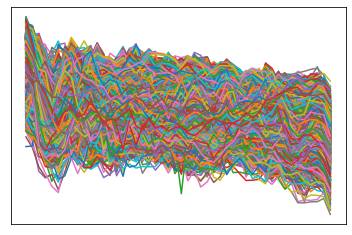

In [5]:
# 지수님은 파랑으로만 했는데,, 데이터 분석할꺼면 3차원 컬러가 낫지
# figsize 조정해도 실제 픽셀은 432*288
#plt.figure(figsize=(3, 3))  <- 걍 보여주는데만 의미있어서 없애줌

# 축 눈금 제거
# 여백 제거는 못했음
#ax = plt.gca()
fig= plt.gca()
#ax.axes.xaxis.set_visible(False)
#ax.axes.yaxis.set_visible(False)
#ax.axes.get_xaxis().set_visible(False)
#ax.axes.get_yaxis().set_visible(False)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

plt.plot(mel)
#plt.savefig(fname='./mel_plot_image/image.jpg', bbox_inches='tight', pad_inches=0)

#plt.tight_layout()
#plt.figure()
plt.show()

In [ ]:
# 내가 가지고 있는 부분 전체를 이미지 저장하기  7-1.변형하여 만듦 
# 저장경로 : mel_plot_image

# 한번 실행해서 나머지는 이거는 나중에 실행 안되거 주석 처리함
#path = 'arena/'
#npy_list = os.listdir(path)

#ax = plt.gca()
#ax.axes.xaxis.set_visible(False)
#ax.axes.yaxis.set_visible(False)

#num = 1
#for i in tq(npy_list):
#    mel = np.load("./arena/{}".format(i))
#    plt.plot(mel)
#    plt.savefig("./mel_plot_image/{}".format(num))
#    num = num+1


<ipython-input-38-3132bb50c8c4>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tq(npy_list):


In [50]:
# 이미지 크기 변경 프로그램 써서 먼저 필요함+
 # -> 완료

In [29]:
image = glob.glob('/Users/bigdata02/05.2ndProject/01.kakaoArenaData/mel_plot_image/*.*')
data = []
for i in image:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (67, 100))   # 왜 사이즈를 이렇게 해야 하는지, 변경해도 되는지 궁금함.
    image=np.array(image)
    data.append(image)
    

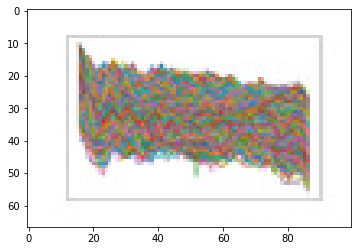

In [30]:
# 이미지 잘 되어 있는지 확인
import matplotlib.pyplot as plt
plt.imshow(data[0])
plt.show()

In [31]:
# y의 정보 가지고 있는 곳
Xy_144008 = pd.read_csv('Xy_144008.csv').sort_values('id')
Xy_144008 = Xy_144008.reset_index()


labels = []
for i in range(310):
    labels.append(Xy_144008['cluster_km'][i])

In [32]:
train_data = np.array(data)
train_labels = np.array(labels)

In [33]:

len(train_data)    

310

In [34]:
len(train_labels)

310

In [35]:
X_train, X_test, y_train, y_test = train_test_split(train_data,train_labels,
                                                   test_size=0.3,
                                                   random_state=7) 


# 데이터들의 크기 확인하기
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((217, 67, 100, 3), (93, 67, 100, 3), (217,), (93,))

In [36]:
# Normalize data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [37]:
# One-hot encode target classes
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [45]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
#import keras.backend.tensorflow_backend as K
import tensorflow as tf
from keras import regularizers
from keras import layers, models
#from keras.applications import VGG16   <- 이거 안되서 아래로 다른 이름으로 넣음
from keras.applications.vgg16 import VGG16
from keras import Input
from keras.models import Model
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint
import os
from glob import glob
from PIL import Image
import numpy as np
from tensorflow.keras import optimizers

In [46]:
# shape 변경해줌
input_tensor = Input(shape=(67, 100, 3), dtype='float32', name='input')

In [47]:
#vgg16 모델 불러오기
#shape 변경해줌
pre_trained_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(67, 100, 3))
pre_trained_vgg.trainable = False
pre_trained_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 67, 100, 3)]      0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 67, 100, 64)       1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 67, 100, 64)       36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 33, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 33, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 33, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 25, 128)       0     

In [48]:
additional_model = models.Sequential()
additional_model.add(pre_trained_vgg)
additional_model.add(layers.Flatten())

additional_model.add(layers.Dense(1024, kernel_regularizer = regularizers.l1_l2
                                  (l1=0.001,l2=0.001),activation='relu'))
additional_model.add(layers.Dropout(0.5))

additional_model.add(layers.Dense(4, activation='softmax'))

additional_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [49]:
history = additional_model.fit(X_train, y_train, 
                    batch_size=50, 
                    epochs=3000, 
                    validation_data=(X_test, y_test))

Epoch 1/3000
5/5 [==============================] - 1s 74ms/step - loss: 61.8374 - acc: 0.3917 - val_loss: 59.8671 - val_acc: 0.4194
Epoch 2/3000
5/5 [==============================] - 0s 35ms/step - loss: 59.2808 - acc: 0.4009 - val_loss: 58.0049 - val_acc: 0.4194
Epoch 3/3000
5/5 [==============================] - 0s 35ms/step - loss: 57.4535 - acc: 0.3825 - val_loss: 56.2679 - val_acc: 0.4516
Epoch 4/3000
5/5 [==============================] - 0s 34ms/step - loss: 55.8905 - acc: 0.3180 - val_loss: 54.8547 - val_acc: 0.2903
Epoch 5/3000
5/5 [==============================] - 0s 36ms/step - loss: 54.3735 - acc: 0.3502 - val_loss: 53.3170 - val_acc: 0.3441
Epoch 6/3000
5/5 [==============================] - 0s 35ms/step - loss: 52.9086 - acc: 0.3687 - val_loss: 51.9306 - val_acc: 0.4194
Epoch 7/3000
5/5 [==============================] - 0s 34ms/step - loss: 51.5275 - acc: 0.3641 - val_loss: 50.5940 - val_acc: 0.2903
Epoch 8/3000
5/5 [==============================] - 0s 36ms/step - lo

Epoch 124/3000
5/5 [==============================] - 0s 35ms/step - loss: 3.0184 - acc: 0.4055 - val_loss: 3.0374 - val_acc: 0.4409
Epoch 125/3000
5/5 [==============================] - 0s 34ms/step - loss: 2.9811 - acc: 0.4194 - val_loss: 3.1534 - val_acc: 0.4194
Epoch 126/3000
5/5 [==============================] - 0s 36ms/step - loss: 3.0326 - acc: 0.4009 - val_loss: 3.0764 - val_acc: 0.4194
Epoch 127/3000
5/5 [==============================] - 0s 35ms/step - loss: 2.9408 - acc: 0.4747 - val_loss: 3.0573 - val_acc: 0.3118
Epoch 128/3000
5/5 [==============================] - 0s 34ms/step - loss: 2.9499 - acc: 0.3825 - val_loss: 2.9934 - val_acc: 0.4194
Epoch 129/3000
5/5 [==============================] - 0s 35ms/step - loss: 2.9601 - acc: 0.4286 - val_loss: 3.0402 - val_acc: 0.3011
Epoch 130/3000
5/5 [==============================] - 0s 36ms/step - loss: 2.9440 - acc: 0.3871 - val_loss: 2.9973 - val_acc: 0.4194
Epoch 131/3000
5/5 [==============================] - 0s 34ms/step - 

Epoch 247/3000
5/5 [==============================] - 0s 35ms/step - loss: 2.0356 - acc: 0.4424 - val_loss: 2.0734 - val_acc: 0.4194
Epoch 248/3000
5/5 [==============================] - 0s 36ms/step - loss: 2.0279 - acc: 0.4194 - val_loss: 2.0725 - val_acc: 0.4194
Epoch 249/3000
5/5 [==============================] - 0s 37ms/step - loss: 2.0182 - acc: 0.4332 - val_loss: 2.1194 - val_acc: 0.4194
Epoch 250/3000
5/5 [==============================] - 0s 37ms/step - loss: 2.0417 - acc: 0.3825 - val_loss: 2.0883 - val_acc: 0.4409
Epoch 251/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.9983 - acc: 0.4470 - val_loss: 2.0521 - val_acc: 0.3656
Epoch 252/3000
5/5 [==============================] - 0s 37ms/step - loss: 1.9705 - acc: 0.4747 - val_loss: 2.0750 - val_acc: 0.4194
Epoch 253/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.9867 - acc: 0.4424 - val_loss: 2.1425 - val_acc: 0.3763
Epoch 254/3000
5/5 [==============================] - 0s 34ms/step - 

5/5 [==============================] - 0s 34ms/step - loss: 1.7556 - acc: 0.3917 - val_loss: 1.7794 - val_acc: 0.4194
Epoch 370/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.7324 - acc: 0.4332 - val_loss: 1.8067 - val_acc: 0.4194
Epoch 371/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.7248 - acc: 0.4332 - val_loss: 1.8061 - val_acc: 0.4194
Epoch 372/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.7246 - acc: 0.4516 - val_loss: 1.7812 - val_acc: 0.4194
Epoch 373/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.7060 - acc: 0.4194 - val_loss: 1.7575 - val_acc: 0.4194
Epoch 374/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.6963 - acc: 0.4793 - val_loss: 1.7614 - val_acc: 0.3656
Epoch 375/3000
5/5 [==============================] - 0s 34ms/step - loss: 1.7099 - acc: 0.4055 - val_loss: 1.7870 - val_acc: 0.4194
Epoch 376/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.7348 - 

Epoch 431/3000
5/5 [==============================] - 0s 38ms/step - loss: 1.6701 - acc: 0.4332 - val_loss: 1.6842 - val_acc: 0.4194
Epoch 432/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.6417 - acc: 0.4424 - val_loss: 1.7220 - val_acc: 0.3548
Epoch 433/3000
5/5 [==============================] - 0s 37ms/step - loss: 1.6580 - acc: 0.4470 - val_loss: 1.6899 - val_acc: 0.3978
Epoch 434/3000
5/5 [==============================] - 0s 37ms/step - loss: 1.6324 - acc: 0.4470 - val_loss: 1.6856 - val_acc: 0.4194
Epoch 435/3000
5/5 [==============================] - 0s 34ms/step - loss: 1.6408 - acc: 0.4378 - val_loss: 1.6991 - val_acc: 0.4194
Epoch 436/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.6381 - acc: 0.4286 - val_loss: 1.7162 - val_acc: 0.4194
Epoch 437/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.6439 - acc: 0.4562 - val_loss: 1.6909 - val_acc: 0.4194
Epoch 438/3000
5/5 [==============================] - 0s 35ms/step - 

Epoch 554/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.5474 - acc: 0.4332 - val_loss: 1.6432 - val_acc: 0.3226
Epoch 555/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.5663 - acc: 0.4101 - val_loss: 1.5956 - val_acc: 0.4194
Epoch 556/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.5700 - acc: 0.4332 - val_loss: 1.6095 - val_acc: 0.4194
Epoch 557/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.5475 - acc: 0.4700 - val_loss: 1.5850 - val_acc: 0.4194
Epoch 558/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.5454 - acc: 0.4332 - val_loss: 1.5911 - val_acc: 0.4194
Epoch 559/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.5565 - acc: 0.4608 - val_loss: 1.5839 - val_acc: 0.4194
Epoch 560/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.5556 - acc: 0.4009 - val_loss: 1.5887 - val_acc: 0.4194
Epoch 561/3000
5/5 [==============================] - 0s 35ms/step - 

Epoch 677/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.5100 - acc: 0.4562 - val_loss: 1.5571 - val_acc: 0.4194
Epoch 678/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.5074 - acc: 0.4240 - val_loss: 1.5365 - val_acc: 0.4194
Epoch 679/3000
5/5 [==============================] - 0s 34ms/step - loss: 1.5123 - acc: 0.4608 - val_loss: 1.5679 - val_acc: 0.4194
Epoch 680/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.5031 - acc: 0.4332 - val_loss: 1.5588 - val_acc: 0.4194
Epoch 681/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.5139 - acc: 0.4194 - val_loss: 1.5353 - val_acc: 0.4194
Epoch 682/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.5105 - acc: 0.4286 - val_loss: 1.5401 - val_acc: 0.4194
Epoch 683/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.4892 - acc: 0.4470 - val_loss: 1.5400 - val_acc: 0.3871
Epoch 684/3000
5/5 [==============================] - 0s 35ms/step - 

Epoch 800/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.4906 - acc: 0.4240 - val_loss: 1.5545 - val_acc: 0.4194
Epoch 801/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.4700 - acc: 0.4332 - val_loss: 1.5186 - val_acc: 0.4194
Epoch 802/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.4772 - acc: 0.4516 - val_loss: 1.5471 - val_acc: 0.4194
Epoch 803/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.4696 - acc: 0.4332 - val_loss: 1.5232 - val_acc: 0.4194
Epoch 804/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.4707 - acc: 0.4424 - val_loss: 1.5077 - val_acc: 0.4194
Epoch 805/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.4551 - acc: 0.4424 - val_loss: 1.5261 - val_acc: 0.4194
Epoch 806/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.4722 - acc: 0.4516 - val_loss: 1.5225 - val_acc: 0.3978
Epoch 807/3000
5/5 [==============================] - 0s 36ms/step - 

Epoch 923/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.4524 - acc: 0.4424 - val_loss: 1.5181 - val_acc: 0.4194
Epoch 924/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.4645 - acc: 0.4286 - val_loss: 1.4949 - val_acc: 0.4194
Epoch 925/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.4548 - acc: 0.4332 - val_loss: 1.4941 - val_acc: 0.4194
Epoch 926/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.4459 - acc: 0.4747 - val_loss: 1.5019 - val_acc: 0.4194
Epoch 927/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.4482 - acc: 0.4332 - val_loss: 1.5270 - val_acc: 0.4194
Epoch 928/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.4658 - acc: 0.4378 - val_loss: 1.5092 - val_acc: 0.4194
Epoch 929/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.4483 - acc: 0.4839 - val_loss: 1.5039 - val_acc: 0.3871
Epoch 930/3000
5/5 [==============================] - 0s 34ms/step - 

5/5 [==============================] - 0s 35ms/step - loss: 1.4285 - acc: 0.4516 - val_loss: 1.5274 - val_acc: 0.3441
Epoch 1046/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.4655 - acc: 0.3917 - val_loss: 1.5032 - val_acc: 0.4194
Epoch 1047/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.4607 - acc: 0.4101 - val_loss: 1.4906 - val_acc: 0.3656
Epoch 1048/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.4292 - acc: 0.4700 - val_loss: 1.5032 - val_acc: 0.4194
Epoch 1049/3000
5/5 [==============================] - 0s 37ms/step - loss: 1.4412 - acc: 0.4332 - val_loss: 1.4952 - val_acc: 0.4194
Epoch 1050/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.4518 - acc: 0.4055 - val_loss: 1.4867 - val_acc: 0.4301
Epoch 1051/3000
5/5 [==============================] - 0s 34ms/step - loss: 1.4444 - acc: 0.4516 - val_loss: 1.4947 - val_acc: 0.4194
Epoch 1052/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.

5/5 [==============================] - 0s 35ms/step - loss: 1.4250 - acc: 0.4608 - val_loss: 1.4922 - val_acc: 0.4301
Epoch 1168/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.4159 - acc: 0.4747 - val_loss: 1.4771 - val_acc: 0.3656
Epoch 1169/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.4310 - acc: 0.4378 - val_loss: 1.4861 - val_acc: 0.4194
Epoch 1170/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.4365 - acc: 0.4516 - val_loss: 1.4902 - val_acc: 0.4194
Epoch 1171/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.4166 - acc: 0.4562 - val_loss: 1.4850 - val_acc: 0.4194
Epoch 1172/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.4109 - acc: 0.4286 - val_loss: 1.4800 - val_acc: 0.3441
Epoch 1173/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.4257 - acc: 0.4747 - val_loss: 1.4751 - val_acc: 0.3978
Epoch 1174/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.

5/5 [==============================] - 0s 35ms/step - loss: 1.4039 - acc: 0.4885 - val_loss: 1.4762 - val_acc: 0.3548
Epoch 1290/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.4215 - acc: 0.4516 - val_loss: 1.4942 - val_acc: 0.4194
Epoch 1291/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.4038 - acc: 0.4608 - val_loss: 1.4863 - val_acc: 0.4301
Epoch 1292/3000
5/5 [==============================] - 0s 34ms/step - loss: 1.4491 - acc: 0.4055 - val_loss: 1.4748 - val_acc: 0.3548
Epoch 1293/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.4161 - acc: 0.4240 - val_loss: 1.4788 - val_acc: 0.4086
Epoch 1294/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.4231 - acc: 0.4194 - val_loss: 1.5015 - val_acc: 0.4194
Epoch 1295/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3877 - acc: 0.4654 - val_loss: 1.4891 - val_acc: 0.4194
Epoch 1296/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.

5/5 [==============================] - 0s 36ms/step - loss: 1.4000 - acc: 0.4516 - val_loss: 1.4925 - val_acc: 0.4086
Epoch 1412/3000
5/5 [==============================] - 0s 34ms/step - loss: 1.4116 - acc: 0.4608 - val_loss: 1.4736 - val_acc: 0.3441
Epoch 1413/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.4033 - acc: 0.4378 - val_loss: 1.4729 - val_acc: 0.3978
Epoch 1414/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.4145 - acc: 0.4608 - val_loss: 1.4781 - val_acc: 0.4409
Epoch 1415/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.4079 - acc: 0.4608 - val_loss: 1.4774 - val_acc: 0.3548
Epoch 1416/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.4178 - acc: 0.4516 - val_loss: 1.5222 - val_acc: 0.4194
Epoch 1417/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3770 - acc: 0.4516 - val_loss: 1.4824 - val_acc: 0.3978
Epoch 1418/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.

5/5 [==============================] - 0s 36ms/step - loss: 1.4166 - acc: 0.4147 - val_loss: 1.4802 - val_acc: 0.3978
Epoch 1534/3000
5/5 [==============================] - 0s 37ms/step - loss: 1.4125 - acc: 0.4608 - val_loss: 1.4717 - val_acc: 0.3441
Epoch 1535/3000
5/5 [==============================] - 0s 37ms/step - loss: 1.3998 - acc: 0.4747 - val_loss: 1.4782 - val_acc: 0.4301
Epoch 1536/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3866 - acc: 0.4654 - val_loss: 1.4875 - val_acc: 0.4194
Epoch 1537/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.4107 - acc: 0.4654 - val_loss: 1.4721 - val_acc: 0.4194
Epoch 1538/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3934 - acc: 0.4608 - val_loss: 1.5309 - val_acc: 0.4194
Epoch 1539/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.4268 - acc: 0.4654 - val_loss: 1.4771 - val_acc: 0.4194
Epoch 1540/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.

5/5 [==============================] - 0s 35ms/step - loss: 1.4018 - acc: 0.4470 - val_loss: 1.4884 - val_acc: 0.4194
Epoch 1656/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.4020 - acc: 0.4700 - val_loss: 1.4770 - val_acc: 0.4086
Epoch 1657/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.3941 - acc: 0.4562 - val_loss: 1.4686 - val_acc: 0.3871
Epoch 1658/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3887 - acc: 0.5023 - val_loss: 1.4801 - val_acc: 0.3978
Epoch 1659/3000
5/5 [==============================] - 0s 34ms/step - loss: 1.3987 - acc: 0.5023 - val_loss: 1.4863 - val_acc: 0.4086
Epoch 1660/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.4048 - acc: 0.4378 - val_loss: 1.5097 - val_acc: 0.4194
Epoch 1661/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.4155 - acc: 0.4332 - val_loss: 1.4807 - val_acc: 0.4301
Epoch 1662/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.

5/5 [==============================] - 0s 36ms/step - loss: 1.3782 - acc: 0.5069 - val_loss: 1.4744 - val_acc: 0.3548
Epoch 1778/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3783 - acc: 0.4793 - val_loss: 1.4724 - val_acc: 0.4194
Epoch 1779/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3965 - acc: 0.4608 - val_loss: 1.4720 - val_acc: 0.4301
Epoch 1780/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.4059 - acc: 0.4608 - val_loss: 1.4744 - val_acc: 0.3763
Epoch 1781/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3921 - acc: 0.4700 - val_loss: 1.4723 - val_acc: 0.3548
Epoch 1782/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3751 - acc: 0.4839 - val_loss: 1.4940 - val_acc: 0.4194
Epoch 1783/3000
5/5 [==============================] - 0s 37ms/step - loss: 1.3886 - acc: 0.4516 - val_loss: 1.4838 - val_acc: 0.4194
Epoch 1784/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.

5/5 [==============================] - 0s 35ms/step - loss: 1.3900 - acc: 0.4424 - val_loss: 1.4741 - val_acc: 0.3656
Epoch 1900/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.3919 - acc: 0.4470 - val_loss: 1.5013 - val_acc: 0.4194
Epoch 1901/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3747 - acc: 0.4608 - val_loss: 1.4812 - val_acc: 0.4194
Epoch 1902/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3766 - acc: 0.4562 - val_loss: 1.4859 - val_acc: 0.3871
Epoch 1903/3000
5/5 [==============================] - 0s 37ms/step - loss: 1.3911 - acc: 0.4654 - val_loss: 1.4938 - val_acc: 0.4194
Epoch 1904/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3778 - acc: 0.4654 - val_loss: 1.4862 - val_acc: 0.3656
Epoch 1905/3000
5/5 [==============================] - 0s 34ms/step - loss: 1.3909 - acc: 0.4470 - val_loss: 1.4702 - val_acc: 0.3656
Epoch 1906/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.

5/5 [==============================] - 0s 36ms/step - loss: 1.3789 - acc: 0.4700 - val_loss: 1.4830 - val_acc: 0.4194
Epoch 2022/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3912 - acc: 0.4700 - val_loss: 1.4758 - val_acc: 0.4194
Epoch 2023/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.3627 - acc: 0.4839 - val_loss: 1.4934 - val_acc: 0.4301
Epoch 2024/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3820 - acc: 0.4931 - val_loss: 1.4913 - val_acc: 0.3871
Epoch 2025/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3750 - acc: 0.4793 - val_loss: 1.4953 - val_acc: 0.4194
Epoch 2026/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.4076 - acc: 0.4378 - val_loss: 1.4789 - val_acc: 0.3763
Epoch 2027/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3772 - acc: 0.4608 - val_loss: 1.4765 - val_acc: 0.3763
Epoch 2028/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.

5/5 [==============================] - 0s 35ms/step - loss: 1.3654 - acc: 0.4608 - val_loss: 1.5086 - val_acc: 0.4086
Epoch 2144/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.3852 - acc: 0.4747 - val_loss: 1.4793 - val_acc: 0.3656
Epoch 2145/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3695 - acc: 0.4654 - val_loss: 1.4766 - val_acc: 0.3656
Epoch 2146/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3559 - acc: 0.4608 - val_loss: 1.4749 - val_acc: 0.3871
Epoch 2147/3000
5/5 [==============================] - 0s 37ms/step - loss: 1.3869 - acc: 0.4654 - val_loss: 1.4767 - val_acc: 0.3763
Epoch 2148/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3930 - acc: 0.4793 - val_loss: 1.4827 - val_acc: 0.3978
Epoch 2149/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3810 - acc: 0.4885 - val_loss: 1.4855 - val_acc: 0.4301
Epoch 2150/3000
5/5 [==============================] - 0s 37ms/step - loss: 1.

5/5 [==============================] - 0s 35ms/step - loss: 1.3765 - acc: 0.4654 - val_loss: 1.4763 - val_acc: 0.3978
Epoch 2266/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3837 - acc: 0.4793 - val_loss: 1.4729 - val_acc: 0.3656
Epoch 2267/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.3561 - acc: 0.5115 - val_loss: 1.5224 - val_acc: 0.4194
Epoch 2268/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3966 - acc: 0.4654 - val_loss: 1.4940 - val_acc: 0.3978
Epoch 2269/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3673 - acc: 0.4885 - val_loss: 1.4783 - val_acc: 0.3871
Epoch 2270/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.3645 - acc: 0.4885 - val_loss: 1.4814 - val_acc: 0.3978
Epoch 2271/3000
5/5 [==============================] - 0s 34ms/step - loss: 1.3634 - acc: 0.4562 - val_loss: 1.4830 - val_acc: 0.4301
Epoch 2272/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.

5/5 [==============================] - 0s 36ms/step - loss: 1.3708 - acc: 0.4931 - val_loss: 1.4841 - val_acc: 0.4301
Epoch 2388/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3776 - acc: 0.4424 - val_loss: 1.5137 - val_acc: 0.3978
Epoch 2389/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3682 - acc: 0.4793 - val_loss: 1.4792 - val_acc: 0.3656
Epoch 2390/3000
5/5 [==============================] - 0s 37ms/step - loss: 1.3849 - acc: 0.4977 - val_loss: 1.4792 - val_acc: 0.3763
Epoch 2391/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3645 - acc: 0.4839 - val_loss: 1.4945 - val_acc: 0.4194
Epoch 2392/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3881 - acc: 0.4562 - val_loss: 1.4848 - val_acc: 0.4301
Epoch 2393/3000
5/5 [==============================] - 0s 37ms/step - loss: 1.3563 - acc: 0.5207 - val_loss: 1.4773 - val_acc: 0.3763
Epoch 2394/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.

5/5 [==============================] - 0s 35ms/step - loss: 1.3542 - acc: 0.4747 - val_loss: 1.4815 - val_acc: 0.3978
Epoch 2510/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.3413 - acc: 0.5023 - val_loss: 1.4943 - val_acc: 0.3871
Epoch 2511/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3651 - acc: 0.4839 - val_loss: 1.5038 - val_acc: 0.4301
Epoch 2512/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3684 - acc: 0.4747 - val_loss: 1.4952 - val_acc: 0.3978
Epoch 2513/3000
5/5 [==============================] - 0s 37ms/step - loss: 1.3834 - acc: 0.4608 - val_loss: 1.4846 - val_acc: 0.3871
Epoch 2514/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3758 - acc: 0.4931 - val_loss: 1.4914 - val_acc: 0.4194
Epoch 2515/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3611 - acc: 0.4747 - val_loss: 1.4806 - val_acc: 0.3871
Epoch 2516/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.

5/5 [==============================] - 0s 35ms/step - loss: 1.3563 - acc: 0.4654 - val_loss: 1.4904 - val_acc: 0.3656
Epoch 2632/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3628 - acc: 0.5023 - val_loss: 1.4917 - val_acc: 0.3656
Epoch 2633/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.3666 - acc: 0.4608 - val_loss: 1.5115 - val_acc: 0.4194
Epoch 2634/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3866 - acc: 0.4424 - val_loss: 1.5166 - val_acc: 0.4194
Epoch 2635/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3563 - acc: 0.5069 - val_loss: 1.4876 - val_acc: 0.3763
Epoch 2636/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.3656 - acc: 0.4700 - val_loss: 1.4866 - val_acc: 0.3548
Epoch 2637/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3601 - acc: 0.5161 - val_loss: 1.4888 - val_acc: 0.3978
Epoch 2638/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.

5/5 [==============================] - 0s 35ms/step - loss: 1.3655 - acc: 0.4700 - val_loss: 1.5115 - val_acc: 0.4301
Epoch 2754/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.3508 - acc: 0.4608 - val_loss: 1.4932 - val_acc: 0.3548
Epoch 2755/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3425 - acc: 0.4747 - val_loss: 1.4938 - val_acc: 0.3548
Epoch 2756/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3385 - acc: 0.4931 - val_loss: 1.4883 - val_acc: 0.3763
Epoch 2757/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.3540 - acc: 0.4608 - val_loss: 1.5119 - val_acc: 0.4194
Epoch 2758/3000
5/5 [==============================] - 0s 34ms/step - loss: 1.3467 - acc: 0.5115 - val_loss: 1.4882 - val_acc: 0.3656
Epoch 2759/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.3534 - acc: 0.4885 - val_loss: 1.5052 - val_acc: 0.4194
Epoch 2760/3000
5/5 [==============================] - 0s 37ms/step - loss: 1.

5/5 [==============================] - 0s 35ms/step - loss: 1.3440 - acc: 0.4977 - val_loss: 1.4913 - val_acc: 0.3763
Epoch 2876/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.3679 - acc: 0.4608 - val_loss: 1.4898 - val_acc: 0.3548
Epoch 2877/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3565 - acc: 0.5023 - val_loss: 1.5080 - val_acc: 0.4301
Epoch 2878/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3695 - acc: 0.4885 - val_loss: 1.4968 - val_acc: 0.3978
Epoch 2879/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.3518 - acc: 0.5069 - val_loss: 1.5429 - val_acc: 0.4301
Epoch 2880/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3572 - acc: 0.4839 - val_loss: 1.4911 - val_acc: 0.3763
Epoch 2881/3000
5/5 [==============================] - 0s 34ms/step - loss: 1.3417 - acc: 0.4885 - val_loss: 1.5471 - val_acc: 0.4194
Epoch 2882/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.

5/5 [==============================] - 0s 37ms/step - loss: 1.3617 - acc: 0.4793 - val_loss: 1.4951 - val_acc: 0.3656
Epoch 2998/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3502 - acc: 0.4885 - val_loss: 1.5110 - val_acc: 0.3441
Epoch 2999/3000
5/5 [==============================] - 0s 35ms/step - loss: 1.3557 - acc: 0.4747 - val_loss: 1.5014 - val_acc: 0.4194
Epoch 3000/3000
5/5 [==============================] - 0s 36ms/step - loss: 1.3412 - acc: 0.4977 - val_loss: 1.4967 - val_acc: 0.3871


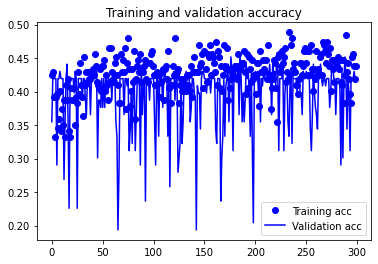

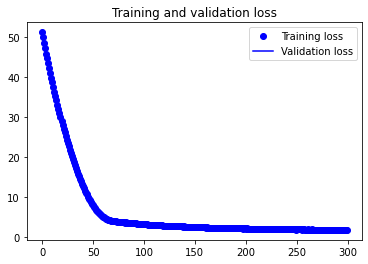

In [44]:
# 정확도 확인
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()